In [748]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.colors as mcolor

In [749]:
## Define box size
N = 300
rho_star = 0.25
L  =(np.sqrt(N/(rho_star)))

In [782]:
### Open data and set numpy arrays

prefix = "/Users/leo/C++/Outputs/2dLW.300.0.25.melt.cool2"
with open(prefix +'_cool_xtraj.txt', 'r') as file: 
    x = [float(line.rstrip()) for line in file]
with open(prefix +'_cool_ytraj.txt', 'r') as file: 
    y = [float(line.rstrip()) for line in file]
with open(prefix +'_cool_vxtraj.txt', 'r') as file: 
    vx= [float(line.rstrip()) for line in file]
with open(prefix +'_cool_vytraj.txt', 'r') as file: 
    vy = [float(line.rstrip()) for line in file]
with open(prefix +'_KE.txt', 'r') as file: 
    KE = [float(line.rstrip()) for line in file]
with open(prefix +'_PE.txt', 'r') as file: 
    PE = [float(line.rstrip()) for line in file]

x = np.array(x)
y = np.array(y)
vx = np.array(vx)
vy = np.array(vy)
KE = np.array(KE)
PE = np.array(PE)


x = x.reshape((int)(x.size/(3*N)), 3*N)
y = y.reshape((int)(x.size/(3*N)), 3*N)
vx = vx.reshape((int)(x.size/(3*N)), 3*N)
vy = vy.reshape((int)(x.size/(3*N)), 3*N)

s = np.min([x.size, y.size, vx.size, vy.size])
len = (int)(np.floor(s/(3*N))*3*N)
x = x[0:len].reshape((int)(len/3/N), (3*N))
y = y[0:len].reshape((int)(len/3/N), (3*N))
vx = vx[0:len].reshape((int)(len/3/N), (3*N))
vy = vy[0:len].reshape((int)(len/3/N), (3*N))

In [792]:
def get_state(t):
    return x[t, :], y[t, :],  vx[t, :], vy[t,:]

# get state at some time 
xt, yt, vxt, vyt = get_state(-1)

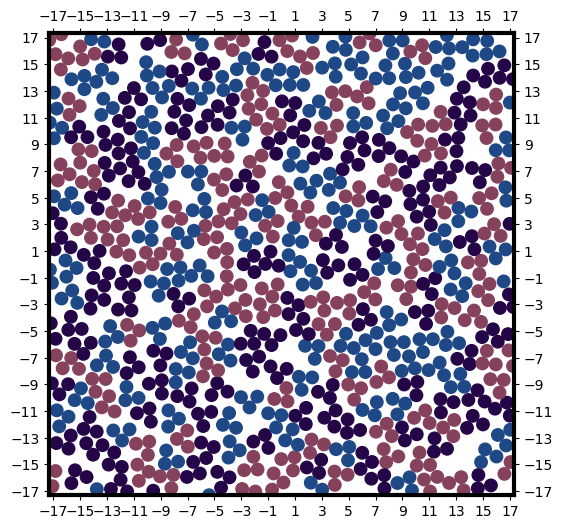

In [754]:
x0 = np.array(xt[0:N])
x00 = np.array(xt[N:2*N])
x000 = np.array(xt[2*N:3*N])
y0 = np.array(yt[0:N])
y00 = np.array(yt[N:2*N])
y000 = np.array(yt[2*N:3*N])
vx0 = np.array(vxt[0:N])
vx00 = np.array(vxt[N:2*N])
vx000 = np.array(vxt[2*N:3*N])
vy0 = np.array(vyt[0:N])
vy00 = np.array(vyt[N:2*N])
vy000 = np.array(vyt[2*N:3*N])


L  =(np.sqrt(N/(rho_star)))
plt.figure(figsize = (6,6))

colors = ['#1E4886', '#240547', '#86425D']

# colors = ['#001476', '#760072', '#40699E', '#16034D']   '#006276'

alph = 1
ss = 80

### ss = 285 for N = 200

indices = [colors[i%3] for i in range(N)]
plt.scatter(x0, y0, color = indices, s = ss, alpha = alph)
plt.scatter(x00, y00, color = indices, s = ss, alpha = alph)
plt.scatter(x000, y000, color = indices, s = ss, alpha = alph)


plt.xlim(-L/2,L/2)
plt.ylim(-L/2,L/2)


plt.xticks(np.arange(np.ceil(-L/2), np.floor(L/2)+1, 2))
plt.yticks(np.arange(np.ceil(-L/2), np.floor(L/2)+1, 2))
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(3)
ax_top = ax.twiny()
ax_top.set_xlim(ax.get_xlim())
ax_top.set_xticks(np.arange(np.ceil(-L/2), np.floor(L/2)+1, 2))
ax_right = ax.twinx()
ax_right.set_ylim(ax.get_ylim())
ax_right.set_yticks(np.arange(np.ceil(-L/2), np.floor(L/2)+1, 2))

plt.show()

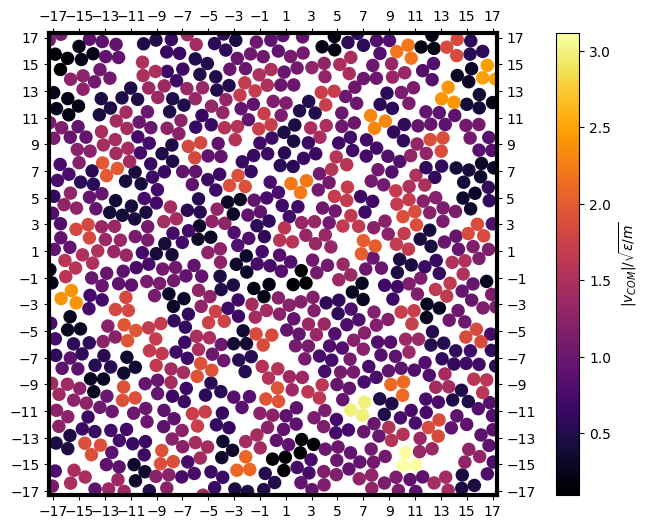

In [793]:
vx_COM = (vx0 + vx00 + vx000)/3
vy_COM = (vy0 + vy00 + vy000)/3
speed_COM = np.sqrt(vx_COM**2 + vy_COM**2)
x_COM = (x0 + x00 + x000)/3
y_COM = (y0 + y00 + y000)/3

norm = mcolors.Normalize(vmin = speed_COM.min(), vmax = speed_COM.max())
cmap = cm.inferno
colors = cmap(norm(speed_COM))

ss = 75 ### 75 for N=300, 110 for N=200
alph = 1.0

plt.figure(figsize = (7.7,6))
plt.scatter(x0, y0, color = colors, s = ss, alpha = alph)
plt.scatter(x00, y00, color = colors, s = ss, alpha = alph)
plt.scatter(x000, y000, color = colors, s = ss, alpha = alph)




plt.xticks(np.arange(np.ceil(-L/2), np.floor(L/2)+1, 2))
plt.yticks(np.arange(np.ceil(-L/2), np.floor(L/2)+1, 2))
plt.xlim(-L/2,L/2)
plt.ylim(-L/2,L/2)

ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(3)
ax_top = ax.twiny()
ax_top.set_xlim(ax.get_xlim())
ax_top.set_xticks(np.arange(np.ceil(-L/2), np.floor(L/2)+1, 2))
ax_right = ax.twinx()
ax_right.set_ylim(ax.get_ylim())
ax_right.set_yticks(np.arange(np.ceil(-L/2), np.floor(L/2)+1, 2))


# --- everything above unchanged ---
ax_right.set_yticks(np.arange(np.ceil(-L/2), np.floor(L/2)+1, 2))

sm = cm.ScalarMappable(norm=norm, cmap=cmap) 
sm.set_array([])                              
cbar = plt.colorbar(sm, ax=ax, pad=0.1)      
cbar.set_label(r"$|v_{COM}|/\sqrt{\epsilon/m}$")

plt.show()

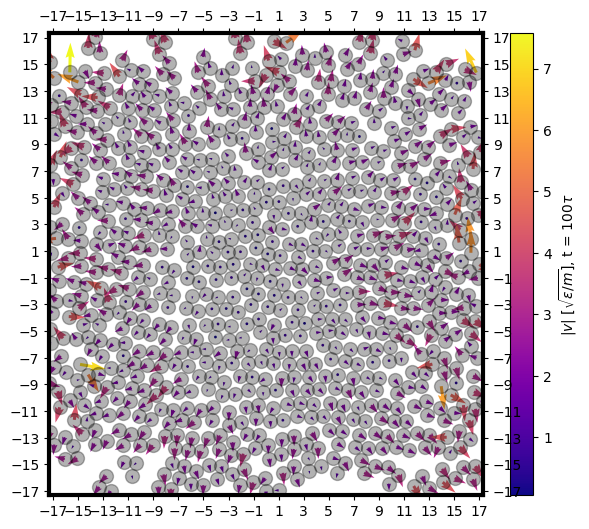

In [441]:
### Velocity Vectors
plt.figure(figsize=(7, 6))

magnitude = np.sqrt(xt**2 + yt**2)
u = vxt
v = vyt

color_magnitude = np.sqrt(u**2 + v**2)

q = plt.quiver(xt, yt, u, v, color_magnitude, angles='xy',
               scale_units='xy', scale=None, cmap='plasma', width=0.007)

plt.colorbar(q, label='$|v|$ [$\\sqrt{\\epsilon/m}$], t = 100$\\tau$')
plt.scatter(xt, yt, color='k', s=100, alpha=0.3)
plt.xlim(-L/2, L/2)
plt.ylim(-L/2, L/2)

plt.xticks(np.arange(np.ceil(-L/2), np.floor(L/2)+1, 2))
plt.yticks(np.arange(np.ceil(-L/2), np.floor(L/2)+1, 2))

ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(3)
ax_top = ax.twiny()
ax_top.set_xlim(ax.get_xlim())
ax_top.set_xticks(np.arange(np.ceil(-L/2), np.floor(L/2)+1, 2))
ax_right = ax.twinx()
ax_right.set_ylim(ax.get_ylim())
ax_right.set_yticks(np.arange(np.ceil(-L/2), np.floor(L/2)+1, 2))

plt.show()


TypeError: 'int' object is not callable

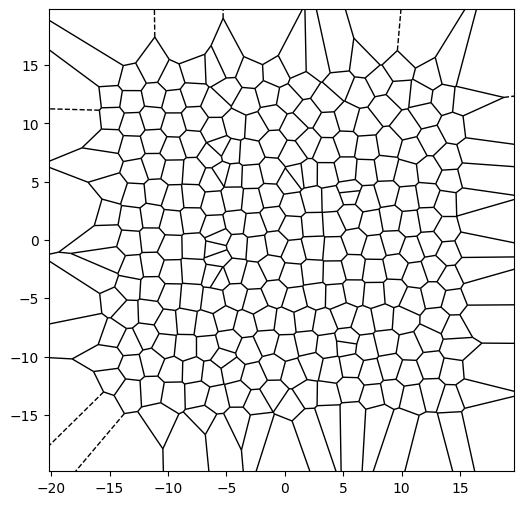

In [448]:
### Voronoi - fix this 

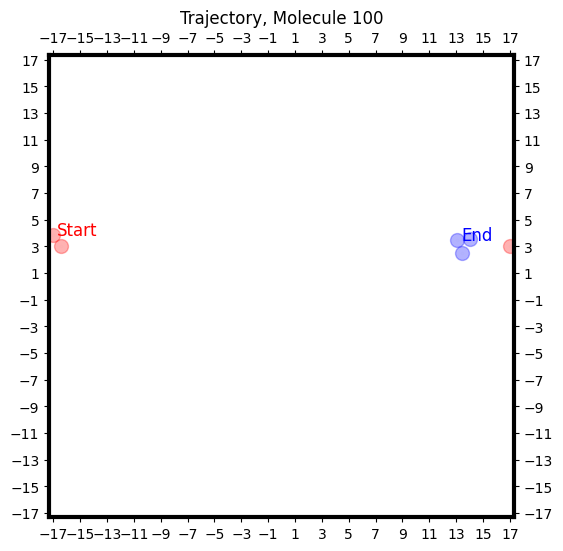

In [785]:
##Single Particle trajectory 

plt.figure(figsize=(6, 6))

magnitude = np.sqrt(xt**2 + yt**2)
u = vxt
v = vyt

n = 100### molecule tracked

plt.scatter(x[:,n], y[:,n], s = 5, color = 'k', alpha = 0.002)
plt.scatter(x[0,n], y[0,n], s = 100, color = 'r', alpha = 0.3)
plt.scatter(x[-1,n], y[-1,n], s = 100, color = 'b', alpha = 0.3)
plt.scatter(x[:,n+N], y[:,n+N], s = 5, color = 'k', alpha = 0.002)
plt.scatter(x[0,n+N], y[0,n+N], s = 100, color = 'r', alpha = 0.3)
plt.scatter(x[-1,n+N], y[-1,n+N], s = 100, color = 'b', alpha = 0.3)
plt.scatter(x[:,n+2*N], y[:,n+2*N], s = 5, color = 'k', alpha = 0.002)
plt.scatter(x[0,n+2*N], y[0,n+2*N], s = 100, color = 'r', alpha = 0.3)
plt.scatter(x[-1,n+2*N], y[-1,n+2*N], s = 100, color = 'b', alpha = 0.3)

plt.xlim(-L/2, L/2)
plt.ylim(-L/2, L/2)


plt.xticks(np.arange(np.ceil(-L/2), np.floor(L/2)+1, 2))
plt.yticks(np.arange(np.ceil(-L/2), np.floor(L/2)+1, 2))
plt.text(x[0,n]+0.3, y[0,n], "Start", color = 'red', fontsize = 12)
plt.text(x[-1,n]+0.3, y[-1,n], "End", color = 'blue', fontsize = 12)
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(3)
plt.title(f"Trajectory, Molecule {n}")

ax_top = ax.twiny()
ax_top.set_xlim(ax.get_xlim())
ax_top.set_xticks(np.arange(np.ceil(-L/2), np.floor(L/2)+1, 2))
ax_right = ax.twinx()
ax_right.set_ylim(ax.get_ylim())
ax_right.set_yticks(np.arange(np.ceil(-L/2), np.floor(L/2)+1, 2))

plt.show()

In [381]:
KE.size


10000

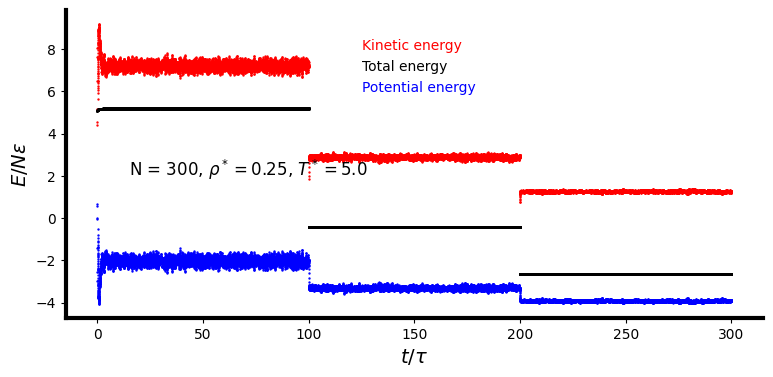

In [787]:
## Plot Kinetic and Potential Energies 

tlim = 300 ##plot 0 to this time in \tau
tlimsteps =(int) (tlim/0.01);
plt.figure(figsize = (9, 4))
time = np.linspace(0,tlim, (int)(tlim/0.01))
### Modify for density of energy computations
# time1 = np.linspace(0, 0.1, 100)
# time2 = np.linspace(0.1, 100, KE.size - 100)
# time = np.append(time1, time2)
# time = np.arange(0,tlim, 0.01)
plt.scatter(time, KE[0:tlimsteps]/(N), color = 'r',  s = 0.5)
plt.scatter(time, PE[0:tlimsteps]/N, color = 'b', s = 0.5)
plt.scatter(time, (PE[0:tlimsteps] + KE[0:tlimsteps])/N, color = 'k', s = 0.5)

# plt.xscale('log')
plt.text(125, 8, "Kinetic energy", color = 'red')
plt.text(125, 7, "Total energy", color = 'black')
plt.text(125, 6, "Potential energy", color = 'blue')

plt.text(15, 2, f"N = {N}, $\\rho^* = {rho_star}$, $T^* = 5.0$", fontsize =12)
plt.xlabel("$t/\\tau$", fontsize = 14)
plt.ylabel("$E/N\\epsilon$", fontsize = 14)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for spine in ax.spines.values():
    spine.set_linewidth(3)


plt.show()


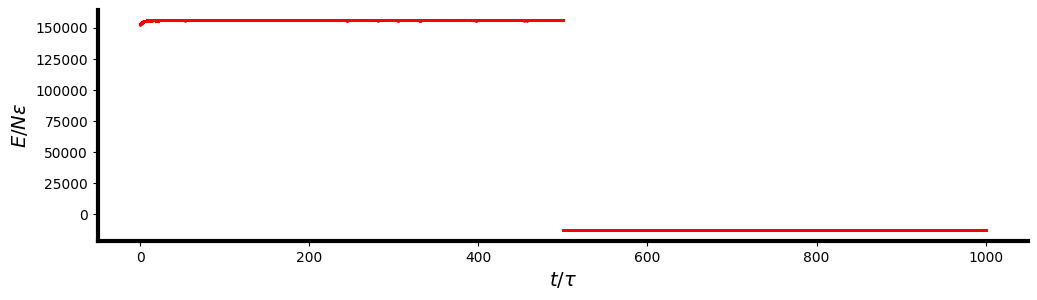

In [772]:
plt.figure(figsize = (12, 3))
time = np.linspace(0,1/0.001+0.001,KE[0:].size)
plt.scatter(time, (PE[0:]+KE[0:])/3*N, s = 1, color = 'r')
# plt.yscale('log')

plt.xlabel("$t/\\tau$", fontsize = 14)
plt.ylabel("$E/N\\epsilon$", fontsize = 14)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for spine in ax.spines.values():
    spine.set_linewidth(3)


plt.show()

In [773]:
x1 = x[:, 0]
x2 = x[:, 1]
x3 = x[:, 2]
y1 =y[:, 0]
y2 = y[:, 1]
y3 = y[:, 2]

x21 = x2-x1
y21 = y1-y2
x31 = x3-x1
y31 = y1-y3

nx = x21 + x31
ny = y21 + y31

norm = np.sqrt(nx**2 + ny**2)
nx = nx/norm
ny = ny/norm

In [774]:
plt.figure(figsize = (16, 5))
time = np.linspace(0, 100, nx.size)
plt.plot(time, np.sin(time), color = 'b', linestyle = "--")
plt.scatter(time, nx, color = 'k', s = 0.1)

plt.text(80, 1.1, "Model $\\hat{n}_x$", color = 'black', fontsize = 12)
plt.text(60, 1.1, "Theoretical $\\hat{n}_x$",color = 'blue',fontsize = 12)

plt.xlabel("t/$\\tau$", fontsize = 14);
plt.ylabel("|$\\hat{n}_x$|", fontsize = 14);
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

plt.figure(figsize = (16, 5))
time = np.linspace(0, 100, nx.size)
plt.plot(time, np.cos(time), color = 'r', linestyle = "--")
plt.scatter(time, ny, color = 'k', s = 0.1)

plt.text(80, 1.1, "Model $\\hat{n}_y$", color = 'black', fontsize = 12)
plt.text(60, 1.1, "Theoretical $\\hat{n}_y$",color = 'red',fontsize = 12)

plt.xlabel("t/$\\tau$", fontsize = 14);
plt.ylabel("|$\\hat{n}_y$|", fontsize = 14);
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()


ValueError: Image size of 902607x1185 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1600x500 with 1 Axes>

ValueError: Image size of 902607x688 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1600x500 with 1 Axes>

In [775]:
diff_nx = np.sin(time) - nx
diff_ny = np.cos(time) - ny
plt.figure(figsize= (16,5))
plt.scatter(time, diff_nx, s= 0.001, color = 'b')
plt.scatter(time, diff_ny, s= 0.001, color = 'r')

plt.text(10,1e-5, "$\\hat{n}_x$ error", color = 'blue', fontsize = 12)
plt.text(17, 1e-5, "$\\hat{n}_y$ error",color = 'red',fontsize = 12)

plt.xlabel("t/$\\tau$", fontsize = 14);
plt.ylabel("$\\delta$|$\\hat{n}_y$|", fontsize = 14);
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for spine in ax.spines.values():
    spine.set_linewidth(3)
plt.show()

ValueError: Image size of 192417x535 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1600x500 with 1 Axes>